In [ ]:
##TIME SERIES FORECASTING FOR TRANSPORTATION PLANNING AND URBAN MOBILITY

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
import seaborn as sns


from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set Tetuan City Power Consumption

In [3]:
df = pd.read_csv('Tetuan_City_power_consumption.csv')

##EDA

In [4]:
# Display the records
df.head(10)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
df.count()

DateTime                     52416
Temperature                  52416
Humidity                     52416
Wind Speed                   52416
general diffuse flows        52416
diffuse flows                52416
Zone 1 Power Consumption     52416
Zone 2  Power Consumption    52416
Zone 3  Power Consumption    52416
dtype: int64

In [7]:
#shows total number of records

len(df)

52416

#Data cleansing

In [8]:
# Drop null values from the dataframe
df = df.dropna()


In [9]:
#Removing spaces between the fields names.

df.columns = df.columns.str.strip().str.replace(" ", "_", regex=False)

In [10]:
df.head()

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [11]:
#Set datetime index

df.set_index("DateTime", inplace=True)

In [12]:
df.head()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
DateTime,,,,,,,,
1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [13]:
#Check attributes from the dataset

list(df.columns)

['Temperature',
 'Humidity',
 'Wind_Speed',
 'general_diffuse_flows',
 'diffuse_flows',
 'Zone_1_Power_Consumption',
 'Zone_2__Power_Consumption',
 'Zone_3__Power_Consumption']

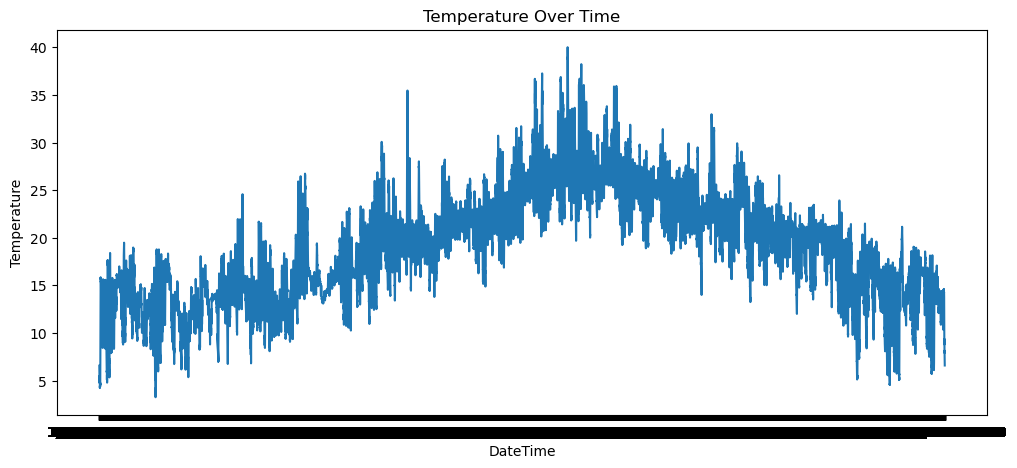

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Temperature"])
plt.xlabel("DateTime")
plt.ylabel("Temperature")
plt.title("Temperature Over Time")
plt.show()

In [15]:
#Plot the Power Consumption over time for Zone 1

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Zone_1_Power_Consumption"])
plt.xlabel("DateTime")
plt.ylabel("Zone_1_Power_Consumption")
plt.title("Power Consumption Over Time")

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
#Plot the Power Consumption over time for Zone 2

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Zone_2__Power_Consumption"])
plt.xlabel("DateTime")
plt.ylabel("Zone 2 Power Consumption")
plt.title("Power Consumption Over Time")

plt.tight_layout()
plt.show()

In [ ]:
#Plot the Power Consumption over time for Zone 3

plt.figure(figsize=(20, 5))
plt.plot(df.index, df["Zone_3__Power_Consumption"])
plt.xlabel("DateTime")
plt.ylabel("Zone 3 Power Consumption")
plt.title("Power Consumption Over Time")

#plt.tight_layout()
plt.show()

In [ ]:
#Plot of the Power Consumption over the 3 zones on the same plot 

plt.figure(figsize=(14, 6))

plt.plot(df.index, df["Zone_1_Power_Consumption"], label="Zone 1")
plt.plot(df.index, df["Zone_2__Power_Consumption"], label="Zone 2")
plt.plot(df.index, df["Zone_3__Power_Consumption"], label="Zone 3")

plt.title("Energy Consumption Across Zones (Yearly)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(24, 12))

plt.plot(df.index, df["Zone_1_Power_Consumption"], label="Zone 1")
plt.plot(df.index, df["Zone_2__Power_Consumption"], label="Zone 2")
plt.plot(df.index, df["Zone_3__Power_Consumption"], label="Zone 3")

plt.title("Energy Consumption Across Zones (Yearly)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(24, 12))

plt.plot(df.index, df["Zone_1_Power_Consumption"], label="Zone 1")

plt.title("Energy Consumption Zone (Yearly)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(24, 12))

plt.plot(df.index, df["Zone_2__Power_Consumption"], label="Zone 2")

plt.title("Energy Consumption Across Zones (Yearly)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Confirm 10 minutes frequency
#df = df.asfreq("10T")

In [ ]:
#Review temperature vs energy consumption

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df.index, df["DateTime"])



###Apply the dick fuller test

In [16]:


# Augmented Dickey-Fuller test
ADF_result = adfuller(df['Zone_1_Power_Consumption'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -32.12127853462601
p-value: 0.0


In [ ]:
#The conclusion from the plot above is that the p-value < than 0.05 indicates that Zone_1_Power_Consumption stationary data.


In [ ]:


# Augmented Dickey-Fuller test
ADF_result = adfuller(df['Zone_2__Power_Consumption'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

In [ ]:
#The conclusion from the plot above is that the p-value < than 0.05 indicates that Zone_2__Power_Consumption stationary data.


In [17]:
# Augmented Dickey-Fuller test
ADF_result = adfuller(df['Zone_3__Power_Consumption'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -16.366867975156765
p-value: 2.8351330869040877e-29


In [ ]:
#The conclusion from the plot above is that the p-value 2.8351330869040877e-29 is < than 0.05 and indicates that Zone_3__Power_Consumption has stationary data.
# It means we do not need to use the difference using np.diff to make the data stationary. 


In [22]:

#Take the difference
Zone_3__Power_Consumption_diff = np.diff(df['Zone_3__Power_Consumption'], n = 1)

In [23]:
#Disregards the tests below!!!

#rerun dick fuller test:
# Augmented Dickey-Fuller test
ADF_result = adfuller(Zone_3__Power_Consumption_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -39.79978015316977
p-value: 0.0


In [ ]:
#TEST NEW PLOT

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Zone_1_Power_Consumption'])
ax.set_xlabel('DateTime')
ax.set_ylabel('Zone_1_Power_Consumption')

#plt.xticks(np.arange(0, 10000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()

In [24]:
##PARTIAL AUTOCORRELATION Power Consumption Zone 3

plot_pacf(df['Zone_3_Consumption_Power'], lags=40)

KeyError: 'Zone_3_Consumption_Power'

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000013A1D9E98A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

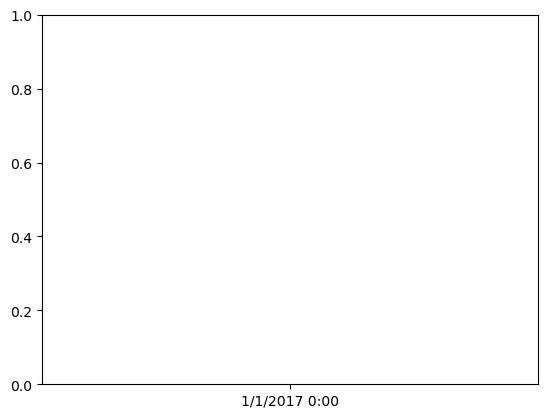

In [25]:
fig, ax = plt.subplots()

ax.plot(df['Zone_2__Power_Consumption'])
ax.set_xlabel('DateTime')
ax.set_ylabel('Zone_1_Power_Consumption')

#plt.xticks(np.arange(0, 10000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Zone_3__Power_Consumption'])
ax.set_xlabel('DateTime')
ax.set_ylabel('Zone_1_Power_Consumption')

#plt.xticks(np.arange(0, 10000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
#Applying autocorrelation function (ACF)

In [ ]:
plot_acf(df['Zone_1_Power_Consumption'], lags = 60)

In [ ]:
plot_acf(df['Zone_2__Power_Consumption'], lags = 60)


In [ ]:
plot_acf(df['Zone_3__Power_Consumption'], lags = 60)

In [ ]:
##PARTIAL AUTOCORRELATION Power Consumption Zone 1

plot_pacf(df['Zone_1_Power_Consumption'], lags=40)

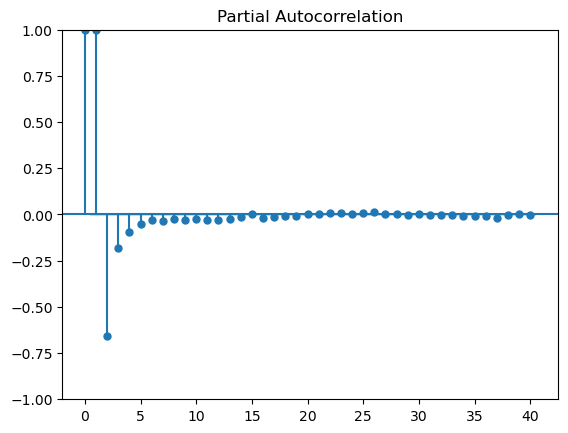

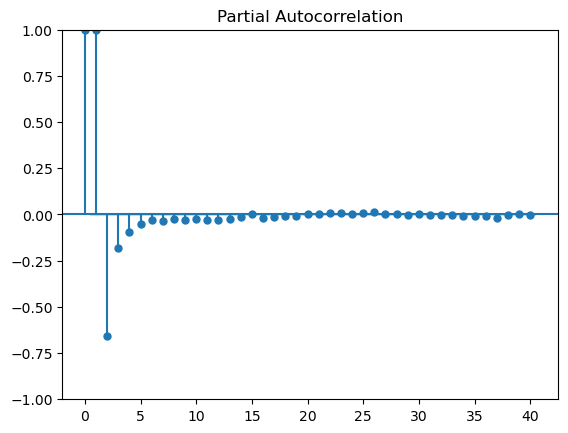

In [20]:
##PARTIAL AUTOCORRELATION Power Consumption Zone 2

plot_pacf(df['Zone_2__Power_Consumption'], lags=40)

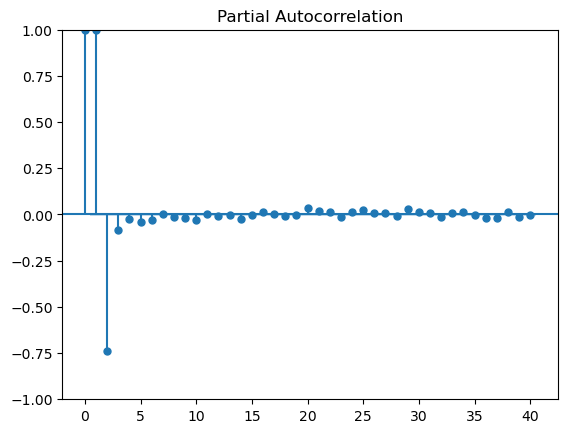

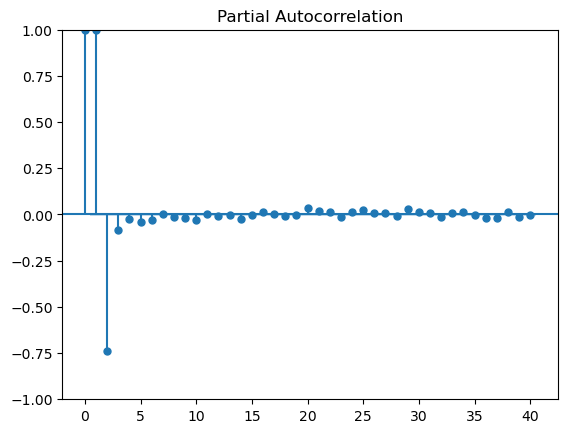

In [26]:
##PARTIAL AUTOCORRELATION Power Consumption Zone 3

plot_pacf(df['Zone_3__Power_Consumption'], lags=40)

In [38]:
# Store the dataframe 
df_diff = pd.DataFrame({'Zone_3__Power_Consumption' : Zone_3__Power_Consumption_diff})

# Remove 52 records from the total dataframe
train = df_diff[:-50000]
test = df_diff[-52416:]

# Display train and test
print(len(train))
print(len(test))

horizon = 36     # 6 hours × 10-minute intervals
window = 1       # step-by-step rolling forecast

2415
52415


In [39]:
df['Zone_3__Power_Consumption'].count()

train = train
print(train)
test = test
print(len(test))

      Zone_3__Power_Consumption
0                    -109.87952
1                    -462.65061
2                    -769.15662
3                    -456.86747
4                    -312.28916
...                         ...
2410                 1197.10843
2411                  537.83133
2412                  271.80723
2413                  225.54217
2414                  364.33735

[2415 rows x 1 columns]
52415


In [69]:
def rolling_forecast_ARIMA(df, train, horizon: int, window: int, order=(3,1,2)):
        
    total_len = train + horizon
    pred_ARIMA = rolling_forecast_ARIMA(
    df_diff,
    train,
    horizon,
    window,
    order=(3,1,2)
)  # store forecasts

    for i in range(train, total_len, window):
        # Fit SARIMAX model on training data
        model = SARIMAX(
            df[:i],
           #order = order(3,1,2)
            order = order
        )
        res = model.fit(disp=False)

        # Forecast the next 'window' steps
        predictions = res.get_prediction(start=i, end=min(i + window - 1, len(df)-1))
        oos_pred = predictions.predicted_mean
        pred_ARIMA.extend(oos_pred)

    return pred_ARIMA

In [70]:
train = df_diff[:-50000]
test = df_diff[-52416:]

# Display train and test
print(len(train))
print(len(test))


train = len(train)
horizon = len(test)
window = 1

print(df_diff, train, horizon, window)


2415
52415
       Zone_3__Power_Consumption
0                     -109.87952
1                     -462.65061
2                     -769.15662
3                     -456.86747
4                     -312.28916
...                          ...
52410                 -207.44298
52411                 -351.50060
52412                 -622.32893
52413                 -293.87755
52414                 -167.10684

[52415 rows x 1 columns] 2415 52415 1


In [72]:
pred_ARIMA = rolling_forecast_ARIMA(df_diff, train, horizon, window)

test['pred_ARIMA'] = pred_ARIMA
# Display first 5 records
test.head()

RecursionError: maximum recursion depth exceeded

In [57]:
# rolling_forecast() is a function that calculated  ARIMA.

pred_ARIMA = rolling_forecast(df_diff, train, horizon, window, 'ARIMA')

test['pred_ARIMA'] = pred_ARIMA

# Display first 5 records
test.head()

NameError: name 'rolling_forecast' is not defined

In [73]:
def rolling_forecast_ARIMA(
    series,
    train_len: int,
    horizon: int,
    window: int = 1,
    model_type: str = "ARIMA"
):
    """
    Rolling forecast for AR or ARIMA models.

    model_type:
        - 'AR'    -> AR(p)
        - 'ARIMA' -> ARIMA(p,d,q)
    """

    # Model configuration
    if model_type == "AR":
        order = (3, 0, 0)
    elif model_type == "ARIMA":
        order = (3, 1, 2)
    else:
        raise ValueError("model_type must be 'AR' or 'ARIMA'")

    total_len = train_len + horizon
    forecasts = []

    for i in range(train_len, total_len, window):
        model = SARIMAX(
            series[:i],
            order=order,
            enforce_stationarity=False,
            enforce_invertibility=False
        )

        res = model.fit(disp=False)

        preds = res.get_prediction(
            start=i,
            end=min(i + window - 1, len(series) - 1)
        )

        forecasts.extend(preds.predicted_mean)

    return forecasts

In [74]:
horizon = 36     # 6 hours × 10 minutes
window = 1


In [75]:
pred_ARIMA = rolling_forecast_ARIMA(
    df_diff,
    train_len=train,
    horizon=horizon,
    window=window,
    model_type="ARIMA"
)

In [77]:
df.index = pd.to_datetime(df.index)


In [78]:
last_time = df.index[-1]

future_index = pd.date_range(
    start=last_time + pd.Timedelta(minutes=10),
    periods=36,
    freq="10min"
)

pred_ARIMA = pd.Series(pred_ARIMA[:36], index=future_index)

<Figure size 1200x500 with 0 Axes>

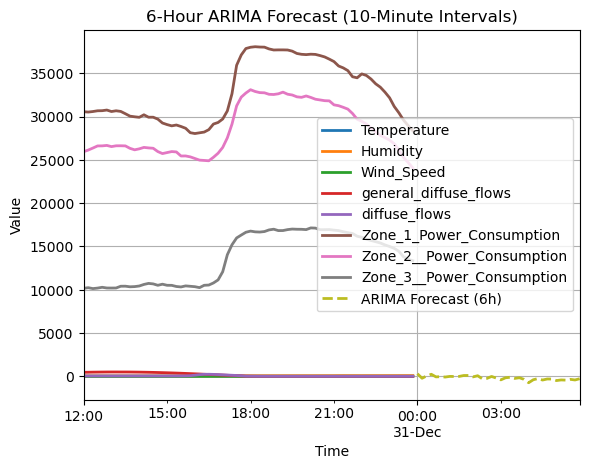

In [79]:

plt.figure(figsize=(12,5))

# Plot recent history (last 12 hours)
df[-72:].plot(label="Observed", linewidth=2)

# Plot forecast
pred_ARIMA.plot(
    label="ARIMA Forecast (6h)",
    linestyle="--",
    linewidth=2
)

plt.title("6-Hour ARIMA Forecast (10-Minute Intervals)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
##USING ONLY AR - Auto Regression

In [85]:
def rolling_forecast_AR(
    series,
    train_len: int,
    horizon: int,
    window: int = 1,
    model_type: str = "AR"
):
  
    # Model configuration
    if model_type == "AR":
        order = (3, 0, 0)

    total_len = train_len + horizon
    forecasts = []

    for i in range(train_len, total_len, window):
        model = SARIMAX(
            series[:i],
            order=order,
            enforce_stationarity=False,
            enforce_invertibility=False
        )

        res = model.fit(disp=False)

        preds = res.get_prediction(
            start=i,
            end=min(i + window - 1, len(series) - 1)
        )

        forecasts.extend(preds.predicted_mean)

    return forecasts

In [86]:
horizon = 36     # 6 hours × 10 minutes
window = 1

pred_AR = rolling_forecast_AR(
    df_diff,
    train_len=train,
    horizon=horizon,
    window=window,
    model_type="AR"
)

In [87]:
last_time = df.index[-1]

future_index = pd.date_range(
    start=last_time + pd.Timedelta(minutes=10),
    periods=36,
    freq="10min"
)

pred_AR = pd.Series(pred_AR[:36], index=future_index)

<Figure size 1200x500 with 0 Axes>

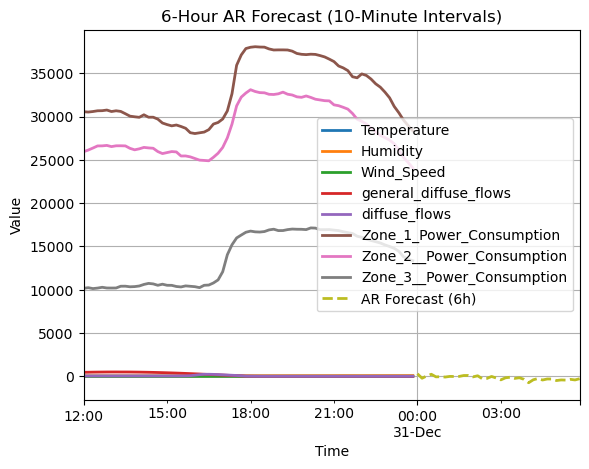

In [89]:
plt.figure(figsize=(12,5))

# Plot recent history (last 12 hours)
df[-72:].plot(label="Observed", linewidth=2)

# Plot forecast
pred_AR.plot(
    label="AR Forecast (6h)",
    linestyle="--",
    linewidth=2
)

plt.title("6-Hour AR Forecast (10-Minute Intervals)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#creation of one zone per figure and plot
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (7, 5))

ax1.plot(df['Zone_1_Power_Consumption'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Avg. montly foot traffic')
ax1.axvspan(948, 1000, color = '#808080', alpha = 0.2)

ax2.plot(df_diff['foot_traffic_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Diff. avg. weekly foot traffic')
ax2.axvspan(947, 999, color = '#808080', alpha = 0.2)

plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:

fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, sharex=True, figsize=(7, 5)
)

for zone in zones:
    ax1.plot(df[zone], label=zone)


    ax1.set_xlabel('Time')
ax1.set_ylabel('Power Consumption')
ax1.axvspan(948, 1000, color='#808080', alpha=0.2)
ax1.legend()




In [ ]:
y.index = pd.to_datetime(y.index)
y = y.resample("10min").asfreq()

In [ ]:
#Check  if data is stationary
adf_result = adfuller(y)
print("ADF p-value:", adf_result[1])

In [ ]:
##PARTIAL AUTOCORRELATION Power Consumption Zone 1

plot_pacf(df['Zone_1_Consumption_Power'], lags=40)